In [2]:
import pandas as pd
import numpy as np
import copy

ratingsAll = pd.read_csv("ratingGrid.csv")
ratingsAll.head()

dataArr = ratingsAll.as_matrix()

In [3]:
def matrix_factorization(R, P, Q, K, alpha, steps=1,  beta=0.02):
    Q = Q.T
    err = []
    testArr = R
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        count = 0
        errTotal = 0
        mse = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if (testArr[i,j] > 0):
                    errTotal += pow(testArr[i,j] - eR[i,j], 2)
                    count += 1
        if (count > 0):
            mse = errTotal / count
        err.append(mse)
    return P, Q.T, err

In [11]:
import time

myTimes = []
for size in range(100, 3001, 100):
    trainSize = dataArr[:, 0:size]
    R = trainSize
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N,10)
    Q = np.random.rand(M,10)
    start = time.clock()
    matrix_factorization(R, P, Q, 10, 0.08)
    end = time.clock()
    myTimes.append(end - start)
print myTimes

[0.9848664992973681, 2.198556439770755, 3.0704502392117945, 4.453764625076985, 5.4588354412391595, 8.194921289059408, 7.547446433928599, 8.654193706282655, 10.316474428812768, 10.883482939383896, 11.683884783604128, 12.845331817535879, 14.241764956657647, 15.545376423033787, 17.154060679266735, 18.376020005368446, 18.81408862678228, 20.288047305512123, 21.79915525871189, 22.375221053794974, 24.82281512007961, 25.25303277911985, 26.70594003126331, 27.184273601440054, 27.382930699635267, 28.65141434954927, 29.596537744935404, 30.374890657319156, 31.48959033994913, 33.30357909778468]


In [5]:
import time

myTimes = []
for size in range(100, 3001, 100):
    trainSize = dataArr[0:size, 0:size]
    R = trainSize
    N = len(R)
    M = len(R[0])
    P = np.random.rand(N,10)
    Q = np.random.rand(M,10)
    start = time.clock()
    matrix_factorization(R, P, Q, 10, 0.08)
    end = time.clock()
    myTimes.append(end - start)
    print size
print myTimes

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
[0.0401741429530631, 0.15020559968515457, 0.33997547093321145, 0.5503432056182369, 0.7549797281907793, 1.1062834121692404, 1.5867168037528607, 1.8923484232752195, 2.2167735553449432, 2.9469557943900497, 3.906576782018547, 3.995479056937512, 5.499261641142198, 6.802848908606528, 7.343349303147917, 7.823638220343973, 9.027408686068611, 11.335008078328798, 13.275194102918661, 14.091913736948456, 15.638529819158336, 15.475915606431244, 16.770282565849328, 19.183779710506485, 20.040032431736847, 20.92484410779369, 22.661782695521026, 24.171724783396968, 25.476408240408546, 28.477874694916295]


times of scaling
[0.9848664992973681, 2.198556439770755, 3.0704502392117945, 4.453764625076985, 5.4588354412391595, 8.194921289059408, 7.547446433928599, 8.654193706282655, 10.316474428812768, 10.883482939383896, 11.683884783604128, 12.845331817535879, 14.241764956657647, 15.545376423033787, 17.154060679266735, 18.376020005368446, 18.81408862678228, 20.288047305512123, 21.79915525871189, 22.375221053794974, 24.82281512007961, 25.25303277911985, 26.70594003126331, 27.184273601440054, 27.382930699635267, 28.65141434954927, 29.596537744935404, 30.374890657319156, 31.48959033994913, 33.30357909778468]

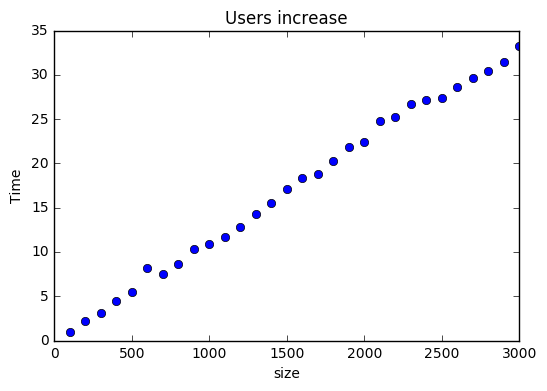

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

times = [0.9848664992973681, 2.198556439770755, 3.0704502392117945, 4.453764625076985, 
         5.4588354412391595, 8.194921289059408, 7.547446433928599, 8.654193706282655, 
         10.316474428812768, 10.883482939383896, 11.683884783604128, 12.845331817535879,
         14.241764956657647, 15.545376423033787, 17.154060679266735, 18.376020005368446,
         18.81408862678228, 20.288047305512123, 21.79915525871189, 22.375221053794974, 
         24.82281512007961, 25.25303277911985, 26.70594003126331, 27.184273601440054, 
         27.382930699635267, 28.65141434954927, 29.596537744935404, 30.374890657319156,
         31.48959033994913, 33.30357909778468]

plt.plot(range(100, 3001, 100), times, 'o')
plt.ylabel('Time')
plt.xlabel('size')
plt.title('Users increase')
plt.show()

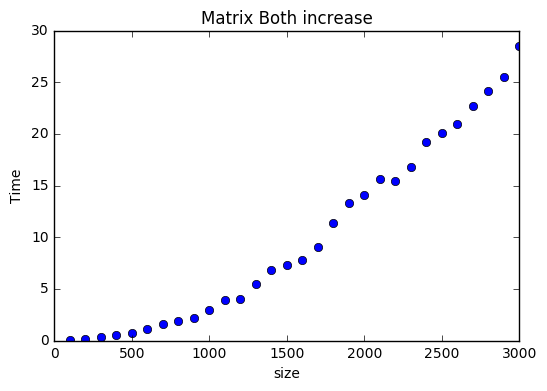

In [6]:
times2 = [0.0401741429530631, 0.15020559968515457, 0.33997547093321145, 
           0.5503432056182369, 0.7549797281907793, 1.1062834121692404, 
           1.5867168037528607, 1.8923484232752195, 2.2167735553449432, 
           2.9469557943900497, 3.906576782018547, 3.995479056937512, 
           5.499261641142198, 6.802848908606528, 7.343349303147917, 
           7.823638220343973, 9.027408686068611, 11.335008078328798, 
           13.275194102918661, 14.091913736948456, 15.638529819158336, 
           15.475915606431244, 16.770282565849328, 19.183779710506485, 
           20.040032431736847, 20.92484410779369, 22.661782695521026, 
           24.171724783396968, 25.476408240408546, 28.477874694916295]

plt.plot(range(100, 3001, 100), times2, 'o')
plt.ylabel('Time')
plt.xlabel('size')
plt.title('Matrix Both increase')
plt.show()